#Primeiro Trabalho - Grafos e Redes Sociais

##1. Import de Bibliotecas

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
!git clone 'https://github.com/nniedev/data-files'

fatal: destination path 'data-files' already exists and is not an empty directory.


In [46]:
m1 = pickle.load(open('/content/data-files/MATRIZx9.pickle', 'rb'))
m2 = pickle.load(open('/content/data-files/MATRIZ_B.pickle', 'rb'))
m3 = pickle.load(open('/content/data-files/MATRIZ_C.pickle', 'rb'))

##2. Desenvolvimento do Trabalho

###2.1. Criando GridLine:

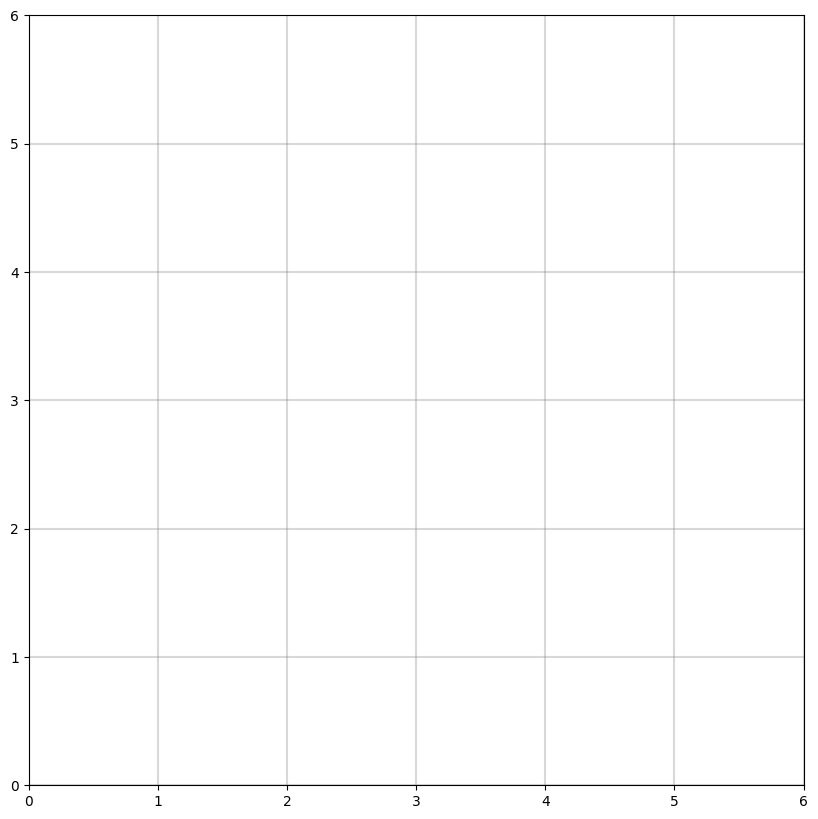

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)

#ax.set_xticks([])
#ax.set_yticks([])

plt.show()

###2.2. Definição de Regras

Regras:

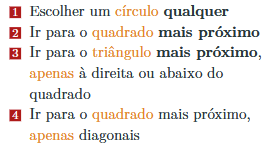

In [48]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}

# Matriz de entrada
MATRIZ = m3

# Criação do grafo direcionado
GraphTestRules = nx.DiGraph()

def dentro_limites(x, y):
    return 0 <= x < len(MATRIZ[0]) and 0 <= y < len(MATRIZ)

In [49]:
# Regra 1: Encontrar todos os quadrados mais próximos (incluindo diagonais)
def encontrar_quadrados(circulo_x, circulo_y):
    quadrados_proximos = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 2: # Quadrado
                dist = abs(circulo_x - x) + abs(circulo_y - y)
                if abs(circulo_x - x) == abs(circulo_y - y):
                  dist = dist/2
                if dist < dist_min:
                    dist_min = dist
                    quadrados_proximos = [(x, y)]
                elif dist == dist_min:
                    quadrados_proximos.append((x, y))

    return quadrados_proximos

# Regra 2: Encontrar o triângulo mais próximo à direita ou abaixo
def encontrar_triangulo(quadrado_x, quadrado_y):
    triangulo_mais_proximo = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 3: # Triângulo
                if x >= quadrado_x and y >= quadrado_y: # Apenas direita ou abaixo
                    dist = abs(quadrado_x - x) + abs(quadrado_y - y)
                    if dist < dist_min:
                        dist_min = dist
                        triangulo_mais_proximo = [(x, y)]
                    elif dist == dist_min:
                        triangulo_mais_proximo.append((x, y))

    return triangulo_mais_proximo

# Regra 3: Encontrar o quadrado mais próximo nas diagonais
def encontrar_quadrado_diagonal(triangulo_x, triangulo_y):
    quadrados_diagonal = []
    x = 1
    max_dist = max(len(MATRIZ), len(MATRIZ[0]))

    while x < max_dist:
        for dx in [-x, x]:
            for dy in [-x, x]:
                x_diag = triangulo_x + dx
                y_diag = triangulo_y + dy
                if dentro_limites(x_diag, y_diag) and MATRIZ[y_diag][x_diag] == 2:
                    quadrados_diagonal.append((x_diag, y_diag))
        if quadrados_diagonal:
            break
        x += 1

    return quadrados_diagonal

# Adicionando nós e arestas ao grafo conforme as regras
estrela = []
nodes = []
for y in range(len(MATRIZ)):
    for x in range(len(MATRIZ[0])):
        forma_atual = MATRIZ[y][x]
        node_atual = f"{f'{x}x'}{f'{y}y'}{numberToLetter[forma_atual]}"
        GraphTestRules.add_node(node_atual)
        nodes.append((x, y))

        if forma_atual == 1: # Círculo (Regra 1)
            quadrados_posicoes = encontrar_quadrados(x,y)
            for qx,qy in quadrados_posicoes:
              print(f"Quadrado ({qx}, {qy})")
              node_quadrado=f"{f'{qx}x'}{f'{qy}y'}{numberToLetter[MATRIZ[qy][qx]]}"
              GraphTestRules.add_edge(node_atual,node_quadrado)

              # Regra Conectar o quadrado ao triângulo mais próximo à direita ou abaixo
              triangulo_pos=encontrar_triangulo(qx,qy)
              for tx,ty in triangulo_pos:
                print(f"Triângulo ({tx}, {ty})")
                node_triangulo=f"{f'{tx}x'}{f'{ty}y'}{numberToLetter[MATRIZ[ty][tx]]}"
                GraphTestRules.add_edge(node_quadrado,node_triangulo)

                # Regra conectar o triângulo ao quadrado mais próximo nas diagonais
                quadrado_diagonal_pos=encontrar_quadrado_diagonal(tx ,ty)
                for qdx,qdy in quadrado_diagonal_pos:
                  print(f"Quadrado Diagonal ({qdx}, {qdy})")
                  node_quadrado_diagonal=f"{f'{qdx}x'}{f'{qdy}y'}{numberToLetter[MATRIZ[qy][qx]]}"
                  GraphTestRules.add_edge(node_triangulo,node_quadrado_diagonal)
                  if node_quadrado_diagonal not in estrela:
                    estrela.append(f"{f'{qdx}x'}{f'{qdy}y'}{numberToLetter[MATRIZ[qy][qx]]}")

Quadrado (1, 2)
Triângulo (2, 2)
Quadrado Diagonal (4, 0)
Triângulo (1, 3)
Quadrado Diagonal (4, 0)
Quadrado (5, 2)
Triângulo (5, 3)
Quadrado Diagonal (2, 0)


###2.3. Plot Final de Caminho com Estrela e Evitando Arestas Sobrepostas

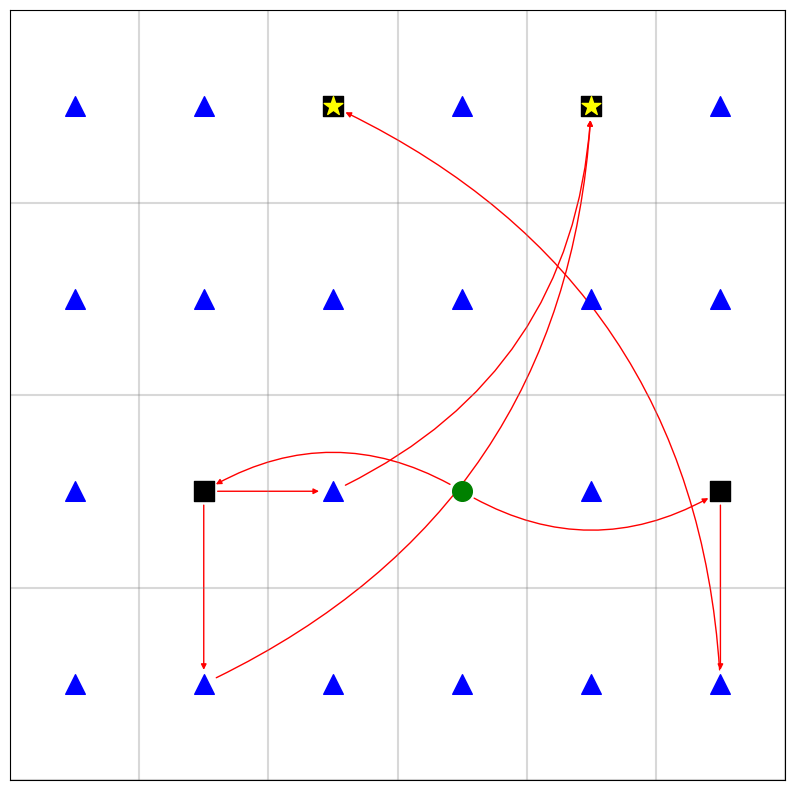

In [50]:
# Plotagem do grafo
#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ)
n_cols = len(MATRIZ[0])

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{f'{x}x'}{f'{y}y'}{numberToLetter[MATRIZ[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}

nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=200)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=200)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=200)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in estrela if "Q" in node],
                       node_color='yellow',
                       node_shape='*',
                       node_size=200)

# Calcular distâncias e criar estilos de conexão personalizados
edge_styles = {}
for u, v in GraphTestRules.edges():
    # Extrair coordenadas x e y dos nós
    x1, y1 = int(u.split('x')[0]), int(u.split('x')[1].split('y')[0])
    x2, y2 = int(v.split('x')[0]), int(v.split('x')[1].split('y')[0])

    # Calcular distância de Manhattan
    dist = abs(x2 - x1) + abs(y2 - y1)

    # Definir rad com base na distância
    if dist >= 2:
        rad = 0.3  # Maior curvatura para arestas longas
    elif dist == 2:
        rad = 0.2  # Curvatura média para arestas médias
    else:
        rad = 0  # Curvatura padrão para arestas curtas

    edge_styles[(u, v)] = f"arc3,rad={rad}"

# Plota as arestas com estilos personalizados
for edge in GraphTestRules.edges():
    nx.draw_networkx_edges(GraphTestRules,
                          pos_adjusted,
                          edgelist=[edge],
                          edge_color='red',
                          arrows=True,
                          arrowsize=8,
                          connectionstyle=edge_styles[edge],
                          min_source_margin=10,
                          min_target_margin=10,
                          node_size=90)


# Adiciona rótulos aos nós (opcional)
#nx.draw_networkx_labels(GraphTestRules,
#                        pos_adjusted,
#                        font_size=5,
#                        font_color="white")


ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()